# Search-Based Software Engineering Exercise
## Exercise 02 - CSP
<center>
    
    Johannes Dorn (johannes.dorn@informatik.uni-leipzig.de)
    
    Softwaresysteme - Summer Term 2023
    
</center>
<center>
    <img src='uni-leipzig.png' style="height:5em" >   <img src='SOSY-Logo.png' style="height:5em">
    
</center>

## Scope of this excercise
 - apply CSP solvers to configurable software systems
 - mini-lesson on Feature Models

For many use cases, it is useful to represent configurations as binary vectors s.a. 
[1 0 1 0 1 1 1]

<center>
    <img src='VP9.png' style="height:20em" />  
</center>

## Short introduction to pycosat
```
pip install pycosat
```

In [ ]:
import pycosat

### Supplying constraints

```pycosat.solve(constraints)``` takes a list of CNF clauses and yields a valid solution

Example with 3 features

In [ ]:
constraints = []
constraints.append([1])
constraints.append([2,-3])
constraints

[[1], [2, -3]]

In [ ]:
pycosat.solve(constraints)

[1, 2, -3]

### Checking for Satisfyability

In [ ]:
solution = pycosat.solve(constraints)
if solution == "UNSAT":
    print("No solutions found!")
else:
    print("Solution:", solution)

Solution: [1, 2, -3]


### Adding constraints

In [ ]:
constraints

[[1], [2, -3]]

In [ ]:
constraints.append([-2])
pycosat.solve(constraints)

[1, -2, -3]

In [ ]:
constraints.append([2])
pycosat.solve(constraints)

'UNSAT'

### Constraints in the wild

# Material

In [ ]:
import pycosat
import numpy as np
import copy

In [ ]:
def parse_dimacs(path):
    """
    A function to parse a provided DIMACS-file.

    Args:
        path (str): The DIMACS-file's file path

    Returns:
        A list of lists containing all of the DIMACS-file's constrains. Each constraint is represented by a seperate sub-list.
    """
    dimacs = list()
    dimacs.append(list())
    with open(path) as mfile:
        for line in mfile:
            tokens = line.split()
            if len(tokens) != 0 and tokens[0] not in ("p", "c"):
                for tok in tokens:
                    lit = int(tok)
                    if lit == 0:
                        dimacs.append(list())
                    else:
                        dimacs[-1].append(lit)
    assert len(dimacs[-1]) == 0
    dimacs.pop()
    return dimacs

In [ ]:
def transform2binary(sol):
    """
    A function which takes a valid variant, consisting of positive and negative integers and transforming it into binary values
    Args:
        sol (list): A list that contains one valid variant, represented by positve and negative integers

    Returns:
        A list that contains the valid variants transformed into binary, where negative integers are now represented as 0 and positive integers as 1
    """
    sol = sorted(sol, key=abs)
    for index, elem in enumerate(sol):
        if float(elem) < 0:
            sol[index] = 0
        else:
            sol[index] = 1
    return sol

In [ ]:
def get_valid_variants(constraint_list, size):
    """
    A function to compute the valid variants of a model.

    Args:
        constraint_list (list): All constrains provided for the model.
        size (int): The desired number of variants for the model.

    Returns:
        A list of variants, which satisfy the provided constrains. Each entry represents one variant.
    """
    my_constraints = copy.deepcopy(constraint_list)
    for i in range(0, size):
            solution = pycosat.solve(my_constraints)
            if solution == "UNSAT":
                print("No more solutions found!")
                break
            binary_solution = transform2binary(solution)
            #print("Pycosat Literals:", solution, "Binary Vector Solution", binary_solution)
            
            #TODO: solve exercise
            
    return []

In [ ]:
def score(a,b):
    """
    returns root-mean-squared distance between two populatons (high is dissimilar, 0.0 is identical)
    """
    
    def get_ft_frequencies(pop):
        pop_np = np.array(pop)
        pop_np = pop_np/np.sum(pop_np)
        return pop_np.sum(axis=0)
    
    a_freqs = get_ft_frequencies(a)
    b_freqs = get_ft_frequencies(b)
    statistic = np.sqrt(np.sum(np.power(a_freqs - b_freqs, 2)))
    return statistic

## Example Usage

In [ ]:
clauses = parse_dimacs("Feature-Modelle (SQLite, VP9)/Feature-Modelle (SQLite, VP9)/VP9.dimacs") 

In [ ]:
variants = get_valid_variants(clauses, 1)
variants

[]

In [ ]:
import pickle
with open( "dump.p", "wb" ) as file:
    pickle.dump( variants,  file)

In [ ]:
with open( "dump.p", "rb" ) as file:
    old_data = pickle.load(file)
old_data

[]

In [ ]:
pop_whole = (
    [1,0,0],
    [1,1,0],
    [1,1,1],
    [0,1,1],
    [0,0,1],
    [1,0,1],
    [0,0,1],
    [0,0,0]
)
pop_sample_biased = (
    [1,0,0],
    [1,1,0],
    [1,1,1]
)
pop_sample_balanced = (
    [1,0,0],
    [0,1,0],
    [0,0,1]
)

In [ ]:
score(pop_whole, pop_sample_balanced)

0.11785113019775789

In [ ]:
score(pop_whole, pop_sample_biased)

0.31180478223116176

# Exemplary Solutions

In [ ]:
from copy import deepcopy

## Task 1 - Feature Models

## Aufgabe 1: Feature-Modelle

a) Gegeben ist das folgende Feature-Diagramm eines konfigurierbaren Software-Systems A. Bestimmen und nennen Sie alle validen Kofigurationen.

b) Wandeln Sie das Feature Diagramm in einen äquivalenten aussagenlogischen Ausdruck um.

In [ ]:
abcde_constraints = [
    [1],
    [3],
    [4, -5],
    [-4, 5]   
]

Using implementation of ```get_valid_variants```from below (spoilers!)

In [42]:
whole_population = get_valid_variants(abcde_constraints, 1000)
len(whole_population)
print(whole_population)

No more solutions found!
Finished in 0.00s
[[1 0 1 0 0]
 [1 0 1 1 1]
 [1 1 1 0 0]
 [1 1 1 1 1]]


## Task 2 - Analysis of Feature Models

## Aufgabe 2: Automatisierte Analyse von Feature-Modellen

a) Gegeben sei ein Feature-Modell mit den Features F1, F2, …, Fn. Das Feature-Modell liegt als aussagenlogische Formel Ѱ (in KNF) vor. Wie lässt sich mittels eines Solvers überprüfen, ob das Feature-Modell Dead Features enthält?

b) Gegeben sei ein Feature-Modell mit den Features F1, F2, …, Fn. Das Feature-Modell enthält optionale Features sowie mandatorische Features, aber keine Cross-Tree Constraints. Wie können durch das Hinzufügen von Cross-Tree Constraints False Optional Features entstehen? Beschreiben Sie kurz ein mögliches Szenario.

c) Gegeben sei ein Feature-Modell mit den Features F1, F2, …, Fn. Das Feature-Modell enthält optionale Features sowie mandatorische Features. Das Feature-Modell liegt als aussagenlogische Formel Ѱ (in KNF) vor. Wie lässt sich mittels eines Solvers überprüfen, ob das Feature-Modell False Optional Features enthält?

d) Im Moodle finden Sie ein Feature-Modell zum Datenbanksystem “SQLite”. Dieses Feature-Modell liegt als konjunktive Normalform im DIMACS-Format vor. Ebenfalls im Moodle finden Sie ein Jupyter-Notebook, mit dessen Hilfe sich DIMACS-Dateien parsen
lassen. Mit einem Solver, etwa Pycosat, können mit diesem Skript Lösungen für einen logischen Ausdruck berechnet werden.

In [30]:
sqlite_clauses = parse_dimacs("Feature-Modelle (SQLite, VP9)/Feature-Modelle (SQLite, VP9)/sqlite.dimacs") 

In [31]:
n_features = 91
always_selected = []
always_deselected = []

for feature_id in range(1, n_features+1):
    new_clauses = deepcopy(sqlite_clauses)
    new_clauses.append([-1 * feature_id])
    solution = pycosat.solve(new_clauses)
    if solution == "UNSAT":
        # no solution where feature is deselected
        always_selected.append(feature_id)  
    
    new_clauses = deepcopy(sqlite_clauses)
    new_clauses.append([feature_id])
    solution = pycosat.solve(new_clauses)
    if solution == "UNSAT":
        # no solution where feature is selected
        always_deselected.append(feature_id)
print("2a")
print("False Optional & Mandatory Features: {}".format(always_selected))
print("2c")
print("Dead Features: {}".format(always_deselected))

2a
False Optional & Mandatory Features: [33, 57, 60, 65, 67, 71, 83, 91]
2c
Dead Features: [13]


# Aufgabe 3: Solver-basiertes Sampling von Konfigurationen

Neben der Analyse von Feature-Modellen können Solver auch genutzt werden, um gültige Konfigurationen (Auswahl von Features) zu errechnen (Sampling). Dabei wird nicht nur versucht, die Erfüllbarkeit eines Feature-Modells zu beweisen/zu widerlegen, sondern gültige Konfigurationen zu generieren. Dies ist insbesondere sinnvoll, wenn Feature-Modelle sehr viele Features und/oder Cross-Tree Constraints enthalten. Diese Aufgabe verwendet das Feature-Modell von “VP9”, welches Sie (zur Übersicht) als Bild-Datei sowie als DIMACS-Datei in Moodle finden.

a) Beschreiben sie in Ihren eigenen Worten einen Algorithmus, welcher mit Hilfe eines CSP-Solvers alle gültigen Konfigurationen eines Feature-Modells ohne Wiederholung auflistet.

b) Die Funktion “get_valid_configurations()” im Jupyter-Notebook generiert beliebig viele gültige Konfigurationen zu einem gegebenen Modell, welche sich jedoch wiederholen. Passen sie die Funktion “get_valid_configurations()” entsprechend Ihrer Lösung von 3 a) an.

In [32]:
import time
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print("Finished in {:04.2f}s".format(te-ts))
        return result    
    return timed

In [33]:
@timeit
def get_valid_variants(constraint_list, size):
    """
    A function to compute the valid variants of a model.

    Args:
        constraint_list (list): All constrains provided for the model.
        size (int): The desired number of variants for the model.

    Returns:
        A numpy matrix with variants, which satisfy the provided constrains. Each row represents one variant.
    """
    new_c = deepcopy(constraint_list)
    sol_collection = list()
    for i in range(0, size):
            c_copy = list(new_c)
            solution = pycosat.solve(c_copy)
            if solution == "UNSAT":
                print("No more solutions found!")
                break
            new_c.append([j * -1 for j in solution])
            solution = transform2binary(solution)
            sol_collection.append(solution)
    m_sol_list = np.array(sol_collection)
    return m_sol_list

c) Wie viele gültige Konfigurationen hat das Feature-Modell zu “VP9”? Generieren Sie hierfür alle validen Konfigurationen und halten sie diese für Aufgabe 4 b) bereit.

In [34]:
clauses_vp9 = parse_dimacs("Feature-Modelle (SQLite, VP9)/Feature-Modelle (SQLite, VP9)/VP9.dimacs") 

In [35]:
whole_population_vp9 = get_valid_variants(clauses_vp9, 100**100)

No more solutions found!
Finished in 14.87s


In [36]:
len(whole_population_vp9)

3008

# Task 4

Bei sehr großen konfigurierbaren Softwaresystemen lassen sich praktisch nicht alle Konfigurationen samplen. Wir verwenden deswegen für die folgenden Teilaufgaben ein festes Budget von 10 Konfigurationen. Diese Konfigurationen sollen den Konfigurationsraum möglichst repräsentativ abdecken. Ein Konfigurationsraum ist repräsentativ abgedeckt, wenn jedes Feature in den gewählten Konfigurationen etwa gleich häufig ausgewählt ist bzw. Konfigurationen hinreichend divers/unterschiedlich sind

a) Solver nutzen intern Backtracking (siehe Vorlesung). Warum kann dies problematisch für die Diversität von Konfigurationen sein, wenn wir diese mit einem Solver generieren/aufzählen (wie in der Methode “get_valid_configurations()”)?

b) Eine Möglichkeit, die Diversität von Konfigurationen zu erhöhen, ist Diversity Promotion (beschrieben in [1]). Hierbei wird u.a. die Reihenfolge von Constraints und Literalen/Features in jedem Constraint beim Generieren jeder neuen Konfiguration permutiert. Argumentieren Sie, warum dies unter dem Hintergrund von Backtracking sinnvoll ist. Implementieren Sie Diversity Promotion mittels Permutieren der Literale innerhalb der KNF-Klauseln und der Klauseln selbst. Vergleichen Sie Ihre vorherige Implementierung von get_valid_configurations() mit der Implementierung mit Diversity Promotion mittels der bereitgestellten score()-Funktion. Diese benötigt als Vergleich die validen Konfigurationen aus Aufgabe 3 c).

In [37]:
budget = 10

In [38]:
from random import shuffle
@timeit
def get_diverse_valid_variants(constraint_list, size):
    """
    A function to compute the valid variants of a model.

    Args:
        constraint_list (list): All constrains provided for the model.
        size (int): The desired number of variants for the model.

    Returns:
        A numpy matrix with variants, which satisfy the provided constrains. Each row represents one variant.
    """
    new_c = deepcopy(constraint_list)
    sol_collection = list()
    for i in range(0, size):
            shuffle(new_c)  # shuffle the constraints
            for constraint in new_c:  # shuffle feature assignment in constraints
                shuffle(constraint)
            c_copy = list(new_c)
            solution = pycosat.solve(c_copy)
            new_c.append([j * -1 for j in solution])
            solution = transform2binary(solution)
            sol_collection.append(solution)
    m_sol_list = np.array(sol_collection)
    return m_sol_list

In [39]:
diverse_sample_set = get_diverse_valid_variants(clauses_vp9, budget)

Finished in 0.01s


In [40]:
list(("".join(str(x)) for x in diverse_sample_set))

['[1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1]',
 '[1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0]',
 '[1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0]',
 '[1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1]',
 '[1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0]',
 '[1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1]',
 '[1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0]',
 '[1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0]',
 '[1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0]',
 '[1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0]']

c) Ein alternativer Ansatz, um möglichst diverse Konfigurationen zu samplen, ist Distanz-basiertes Sampling [2]. Beschreiben Sie kurz die Idee des Ansatzes und grenzen Sie ihn von Diversity Promotion ab.

## Bonus

In [41]:
%%capture
import pandas as pd
sample_sizes = np.arange(10, 300, 30)#[10, 20, 30, 50, 75, 100, 200]
n_reps = 10
results = []
for s in sample_sizes:
    for i in range(n_reps):
        diverse_sample_set = get_diverse_valid_variants(clauses, s)
        simple_sample_set = get_valid_variants(clauses, s)
        score_div = score(whole_population_vp9, diverse_sample_set)
        score_simple = score(whole_population_vp9, simple_sample_set)
        t_simple = ("simple", s, i, score_simple)
        t_div = ("diverse", s, i, score_div)
        results = [*results, t_simple, t_div]

KeyboardInterrupt: 

(0.0, 0.1700388797427963)

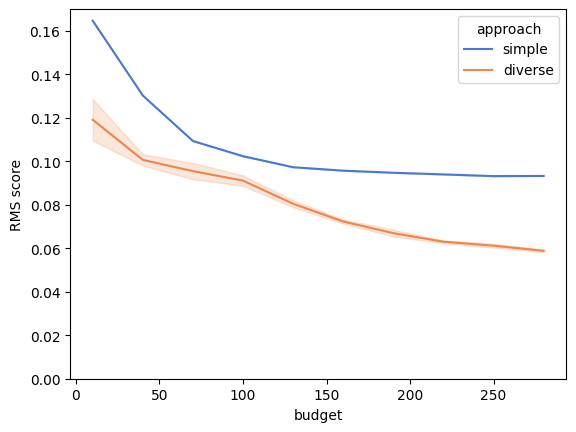

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(results, columns=["approach", "budget", "rnd", "RMS score"])
sns.lineplot(data=df, x="budget", y="RMS score", hue="approach", palette='muted', errorbar='sd')
plt.ylim(0)